# Titanic - Machine Learning from Disaster

https://www.kaggle.com/c/titanic

In [188]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
titanic_path = '/home/ubuntu/pCloudDrive/18.Kaggle microcourses/00.Kaggle micro-courses/07.Intro to Machine Learning/02.Kaggle-Competition-Titanic/titanic/'
train_data = pd.read_csv(titanic_path + 'train.csv')
test_data = pd.read_csv(titanic_path + 'test.csv')

In [191]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [193]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


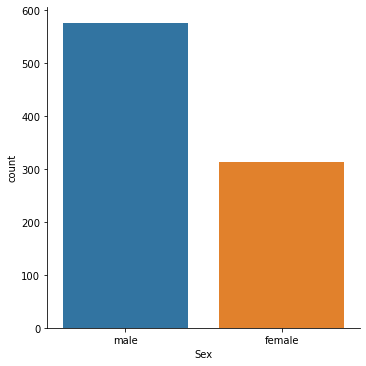

In [194]:
sns.catplot('Sex', data = train_data, kind='count')

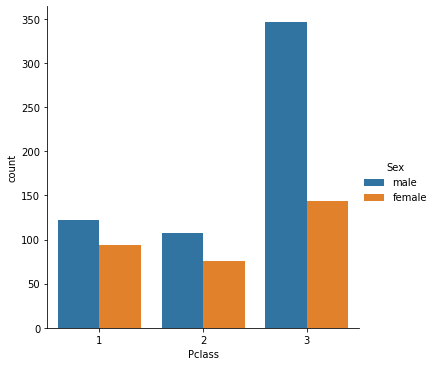

In [195]:
sns.catplot('Pclass', data = train_data, hue='Sex', kind='count')

<AxesSubplot:xlabel='Age'>

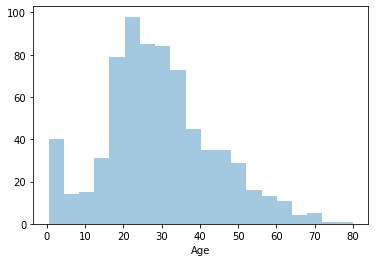

In [196]:
sns.distplot(train_data['Age'], kde=False)

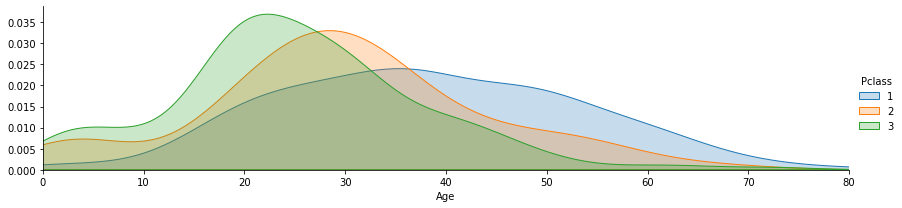

In [197]:
fig = sns.FacetGrid(train_data,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,train_data['Age'].max()))
fig.add_legend()

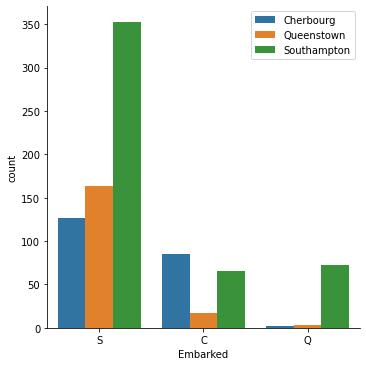

In [198]:
g = sns.catplot('Embarked',data=train_data,hue='Pclass', kind='count', legend = False)
plt.legend(loc='upper right', labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show(g)

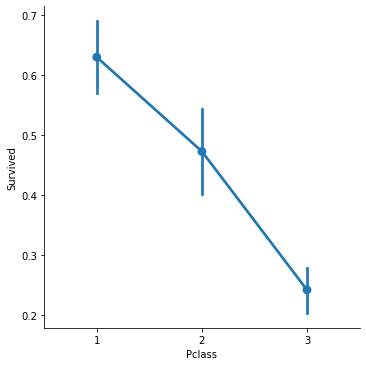

In [199]:
sns.factorplot('Pclass','Survived',data=train_data)

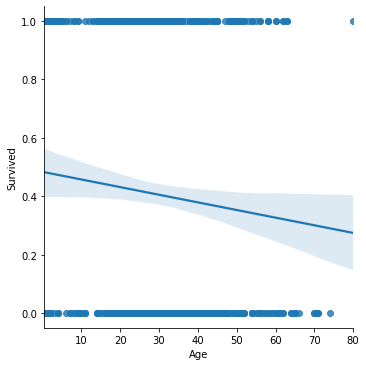

In [200]:
sns.lmplot('Age','Survived',data=train_data)

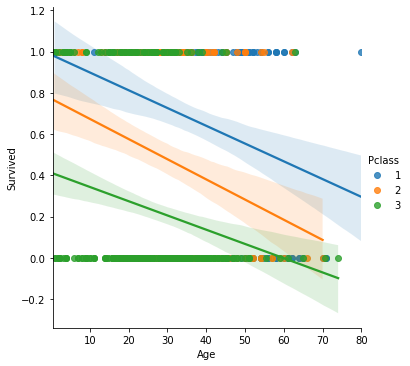

In [201]:
sns.lmplot('Age','Survived',hue='Pclass',data=train_data)

In [202]:
#Choose y and X before doing processing firstly, because there is no point carrying data not used in memory and secondly because imputation wont work on strings
y = train_data['Survived']
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [203]:
def encodeSex(df):
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    return df

In [204]:
encodeSex(X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [205]:
def numpymissingAge(df):
    df['Age'] = df['Age'].fillna(method = 'bfill', axis = 0).fillna(0)
    return df

In [206]:
numpymissingAge(X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,26.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [207]:
def missingFare(df):
    df['Fare'] = df['Fare'].fillna(method = 'bfill', axis = 0).fillna(0)
    return df

In [208]:
missingFare(X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,26.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


### Train test split of cleaned training data before algo implementation

In [209]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [210]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare
35,1,1,42.0,1,0,52.0000
46,3,1,18.0,1,0,15.5000
453,1,1,49.0,1,0,89.1042
291,1,0,19.0,1,0,91.0792
748,1,1,19.0,1,0,53.1000
...,...,...,...,...,...,...
715,3,1,19.0,0,0,7.6500
767,3,0,30.5,0,0,7.7500
72,2,1,21.0,0,0,73.5000
235,3,0,44.0,0,0,7.5500


### Feature scaling for train and val data

In [211]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

### Running several algorithms to decide which to use for test data

[[114  14]
 [ 29  66]]
0.8071748878923767


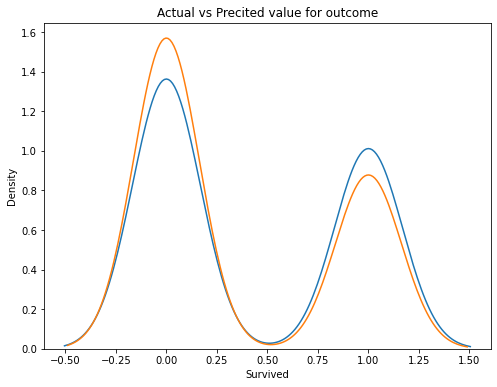

In [213]:
    
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

val_predictions1 = logreg.predict(val_X)

print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
    
plt.figure(figsize=(8, 6))

sns.kdeplot(val_y, label="Actual Value")
sns.kdeplot(val_predictions1, label="Predicted Values")

plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

[[117  11]
 [ 30  65]]
0.8161434977578476


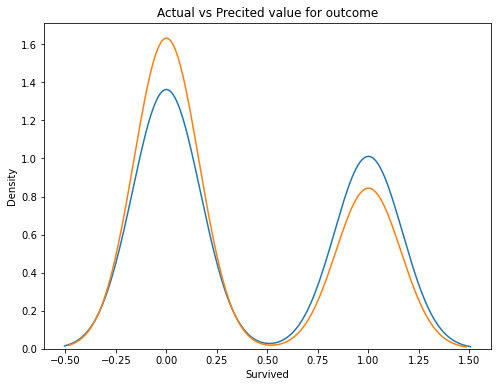

In [233]:
#best results on neighbors = 3 

classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(train_X, train_y)
    
val_predictions1 = classifier.predict(val_X)

print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
    
plt.figure(figsize=(8, 6))

sns.kdeplot(val_y, label="Actual Value")
sns.kdeplot(val_predictions1, label="Predicted Values")

plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

[[111  17]
 [ 31  64]]
0.7847533632286996


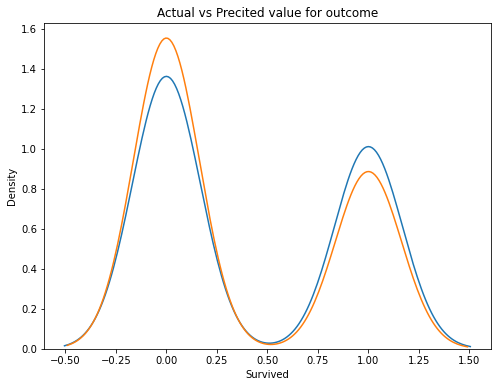

In [215]:

classifier = SVC(kernel = 'linear')
classifier.fit(train_X, train_y)
    
val_predictions1 = classifier.predict(val_X)

print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
    
plt.figure(figsize=(8, 6))

sns.kdeplot(val_y, label="Actual Value")
sns.kdeplot(val_predictions1, label="Predicted Values")

plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

In [216]:
#normalizer = Normalizer().fit(train_X) 
#train_X = normalizer.transform(train_X)

[[109  19]
 [ 34  61]]
0.7623318385650224


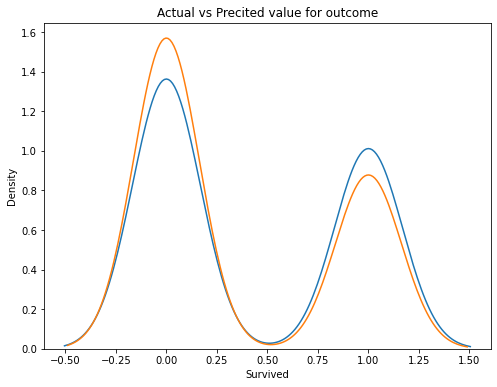

In [217]:

classifier = GaussianNB()
classifier.fit(train_X, train_y)
    
val_predictions1 = classifier.predict(val_X)
  
print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
    
plt.figure(figsize=(8, 6))

sns.kdeplot(val_y, label="Actual Value")
sns.kdeplot(val_predictions1, label="Predicted Values")

plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

[[107  21]
 [ 34  61]]
0.7533632286995515


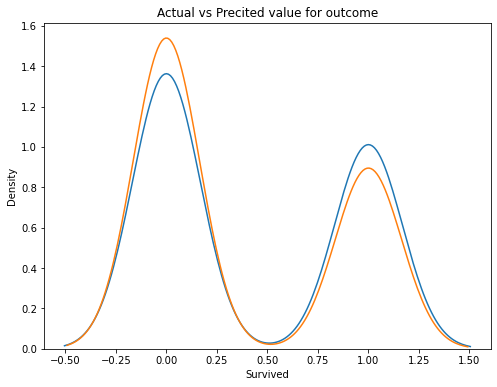

In [138]:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_X, train_y)
    
val_predictions1 = classifier.predict(val_X)
    
print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
    
plt.figure(figsize=(8, 6))

sns.kdeplot(val_y, label="Actual Value")
sns.kdeplot(val_predictions1, label="Predicted Values")

plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

[[117  11]
 [ 41  54]]
0.7668161434977578


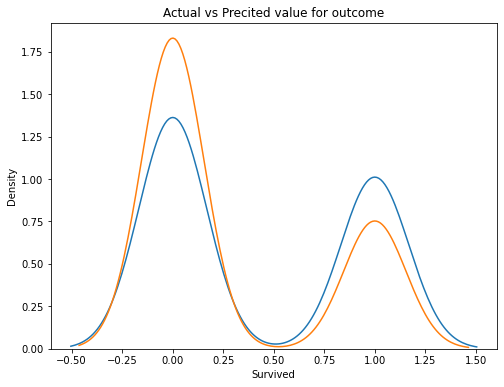

In [139]:

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_X, train_y)
    
val_predictions1 = classifier.predict(val_X)
    
print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
   
plt.figure(figsize=(8, 6))

sns.kdeplot(val_y, label="Actual Value")
sns.kdeplot(val_predictions1, label="Predicted Values")

plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

### Predicting on test data and generating submission file

In [140]:
test_X = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [141]:
encodeSex(test_X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,NaN,0,0,8.0500


In [142]:
numpymissingAge(test_X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,39.0,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,0.0,0,0,8.0500


In [143]:
missingFare(test_X)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,39.0,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,0.0,0,0,8.0500


### Feature scaling for test data

In [144]:
test_X = sc.transform(test_X)

In [145]:
val_predictions2 = logreg.predict(test_X)

In [146]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': val_predictions2})
output.to_csv('titanic/titanic_submission_2.csv', index=False)